In [1]:
from sklearn.metrics import mean_squared_error
import pmdarima as pm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARMA
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [14]:
import pandas as pd

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
y = pm.datasets.load_wineind()
train, test = train_test_split(y, train_size=150)

In [3]:
np.count_nonzero(y)

176

Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(1,0,1,12) [intercept=True]; AIC=2915.641, BIC=2939.673, Time=0.406 seconds
Fit ARIMA(0,1,0)x(0,0,0,12) [intercept=True]; AIC=3049.597, BIC=3055.604, Time=0.013 seconds
Fit ARIMA(1,1,0)x(1,0,0,12) [intercept=True]; AIC=2954.973, BIC=2966.989, Time=0.192 seconds
Fit ARIMA(0,1,1)x(0,0,1,12) [intercept=True]; AIC=2947.014, BIC=2959.029, Time=0.209 seconds
Fit ARIMA(0,1,0)x(0,0,0,12) [intercept=False]; AIC=3047.612, BIC=3050.616, Time=0.015 seconds
Fit ARIMA(2,1,2)x(0,0,1,12) [intercept=True]; AIC=2938.457, BIC=2959.484, Time=0.334 seconds
Fit ARIMA(2,1,2)x(1,0,0,12) [intercept=True]; AIC=2915.636, BIC=2936.664, Time=0.328 seconds
Fit ARIMA(2,1,2)x(0,0,0,12) [intercept=True]; AIC=2984.606, BIC=3002.630, Time=0.158 seconds
Fit ARIMA(2,1,2)x(2,0,0,12) [intercept=True]; AIC=2915.168, BIC=2939.200, Time=1.101 seconds
Fit ARIMA(2,1,2)x(2,0,1,12) [intercept=True]; AIC=2917.256, BIC=2944.291, Time=1.253 seconds
Fit ARIMA(1,1,2)x(2,0,0,12

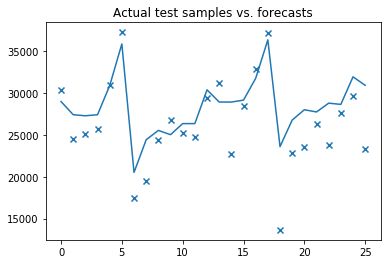

In [15]:
# Fit a simple auto_arima model
arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=10,
                      seasonal=True, m=12)

# #############################################################################
# Plot actual test vs. forecasts:
x = np.arange(test.shape[0])
plt.scatter(x, test, marker='x')
plt.plot(x, arima.predict(n_periods=test.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

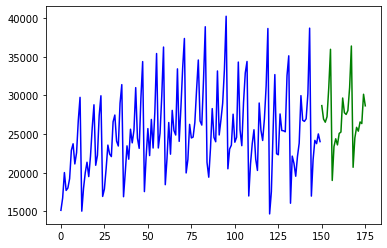

In [44]:
# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(y.shape[0])
plt.plot(x[:150], train, c='blue')
plt.plot(x[150:], forecasts, c='green')
plt.show()

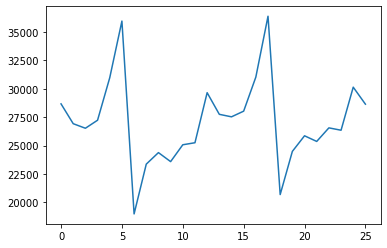

In [47]:
plt.plot(forecasts)

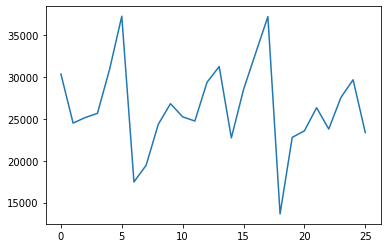

In [59]:
plt.plot(test)

In [74]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [29]:
mse = mean_squared_error(test, forecasts)

rmse = sqrt(mse)

print(rmse)

2622.14382393544


In [31]:
df = pd.DataFrame(data=test, columns=["column1"])

In [32]:
df.head(5)

,column1
0,30345.0
1,24488.0
2,25156.0
3,25650.0
4,30923.0


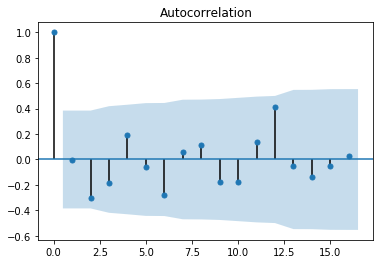

In [50]:
#calculation ACF PACF
acf_plot = plot_acf(df.column1, lags = 16)

C:\Users\prabh\AppData\Roaming\Python\Python37\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


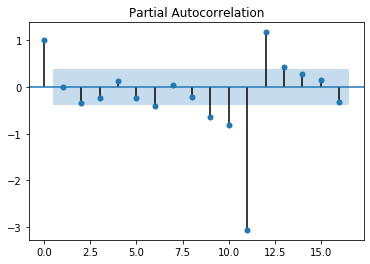

In [49]:
pacf_plot = plot_pacf(df.column1, lags = 16)

In [79]:
#create the model
model = ARMA(test, order=(9,0))
model_fit = model.fit()
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   26
Model:                     ARMA(9, 0)   Log Likelihood                -251.915
Method:                       css-mle   S.D. of innovations           3428.832
Date:                Mon, 27 Jul 2020   AIC                            525.831
Time:                        14:46:19   BIC                            539.670
Sample:                             0   HQIC                           529.816
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.634e+04    217.741    120.951      0.000    2.59e+04    2.68e+04
ar.L1.y       -0.1344      0.153     -0.878      0.380      -0.434       0.166
ar.L2.y       -0.2857      0.162     -1.766      0.0

In [72]:
predictions = model_fit.predict()

In [77]:
mse = mean_squared_error(test, predictions)

rmse = sqrt(mse)

print(rmse)

3981.2327532612394
